# Global Peace Index analysis
data set from kaggle: https://www.kaggle.com/datasets/ddosad/global-peace-index-2023 

Original dataset from: https://www.visionofhumanity.org/

In [382]:
import pandas as pd
# from countryinfo import CountryInfo
import matplotlib
import geopandas as gpd

file_path = 'global_peace_2023.csv'
df = pd.read_csv(file_path)

df.head()


,Country,iso3c,year,Overall Scores,Safety and Security,Ongoing Conflict,Militarian
0,Afghanistan,AFG,2008,3.104,3.372,3.153,2.594
1,Angola,AGO,2008,1.991,2.395,1.655,1.744
2,Albania,ALB,2008,1.791,2.236,1.247,1.776
3,United Arab Emirates,ARE,2008,1.651,1.875,1.000,2.218
4,Argentina,ARG,2008,1.820,2.371,1.403,1.398


In [383]:
world_gdf = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world_gdf.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [384]:
world_gdf = world_gdf.to_crs("+proj=eck4 +lon_0=0 +x_0=0 +y_0=0 +datum=WGS84 +units=m +no_defs")

In [385]:
world_gdf['pop_density'] = world_gdf.pop_est / world_gdf.area * 10**6
world_gdf.sort_values(by='pop_density', ascending=False).head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,pop_density
99,163046161.0,Asia,Bangladesh,BGD,302571,"POLYGON ((8455037.031 2862141.705, 8469605.972...",1213.825913
79,4685306.0,Asia,Palestine,PSE,16276,"POLYGON ((3127401.561 4023733.541, 3087561.638...",927.566405
140,23568378.0,Asia,Taiwan,TWN,1127000,"POLYGON ((11034560.069 3156825.603, 11032285.2...",683.638053
77,6855713.0,Asia,Lebanon,LBN,51991,"POLYGON ((3141154.397 4236334.349, 3117804.289...",677.388357
169,12626950.0,Africa,Rwanda,RWA,10354,"POLYGON ((2859375.715 -149565.705, 2896415.181...",536.821849


In [396]:
df2 = pd.merge(df, world_gdf,left_on='iso3c', right_on='iso_a3', how='left')
df2 = df2.drop(['name', 'iso_a3'], axis=1)

In [397]:
mean_scores = df2.groupby('Country')['Overall Scores'].transform('mean')

# Create a new column in the DataFrame with the mean scores
df2['Mean Overal score'] = mean_scores

In [402]:
gdf = gpd.GeoDataFrame(df2, geometry='geometry')
gdf.head()

,Country,iso3c,year,Overall Scores,Safety and Security,Ongoing Conflict,Militarian,pop_est,continent,gdp_md_est,geometry,pop_density,Mean Overal score
0,Afghanistan,AFG,2008,3.104,3.372,3.153,2.594,38041754.0,Asia,19291.0,"POLYGON ((5723499.090 4711648.636, 5771630.347...",58.168727,3.338000
1,Angola,AGO,2008,1.991,2.395,1.655,1.744,31825295.0,Africa,88815.0,"MULTIPOLYGON (((1219970.700 -629808.388, 11856...",25.408244,1.985562
2,Albania,ALB,2008,1.791,2.236,1.247,1.776,2854191.0,Europe,15279.0,"POLYGON ((1775992.146 5103984.520, 1776862.216...",96.025674,1.782500
3,United Arab Emirates,ARE,2008,1.651,1.875,1.000,2.218,9770529.0,Asia,421142.0,"POLYGON ((4675864.308 3138288.873, 4691297.500...",121.522001,1.809562
4,Argentina,ARG,2008,1.820,2.371,1.403,1.398,44938712.0,South America,445445.0,"MULTIPOLYGON (((-5366505.730 -6330001.687, -53...",16.103545,1.908250


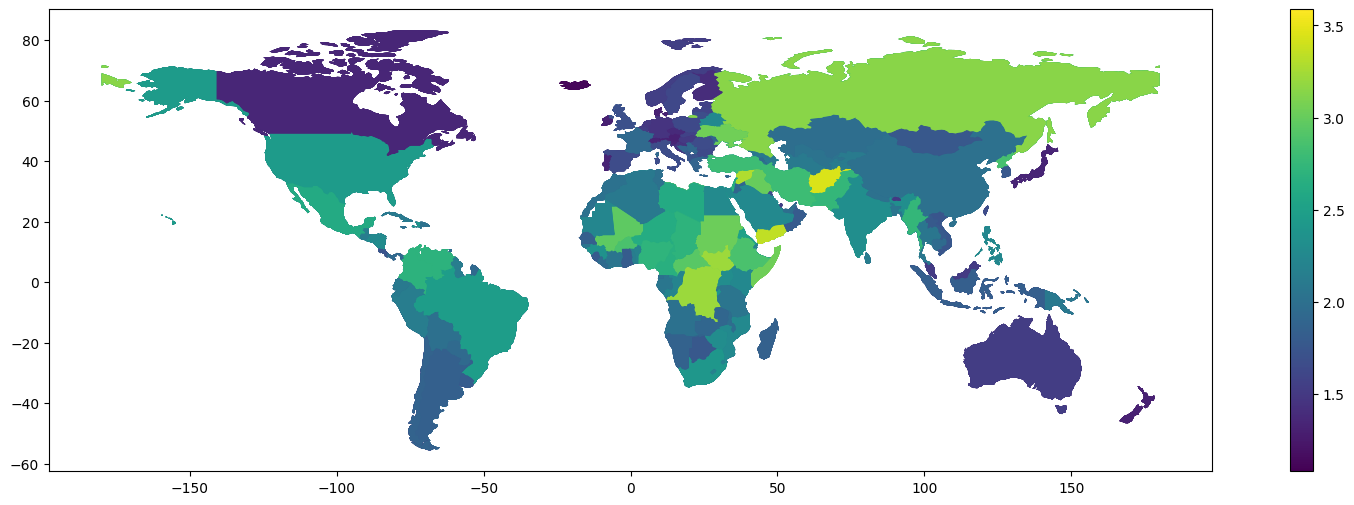

In [403]:
figsize = (20, 6)
norm = matplotlib.colors.LogNorm(vmin=gdf['Overall Scores'].min(), vmax=gdf['Overall Scores'].max())

gdf.to_crs('EPSG:4326').plot("Overall Scores", 
                                   figsize=figsize, 
                                   legend=True);


<Axes: >

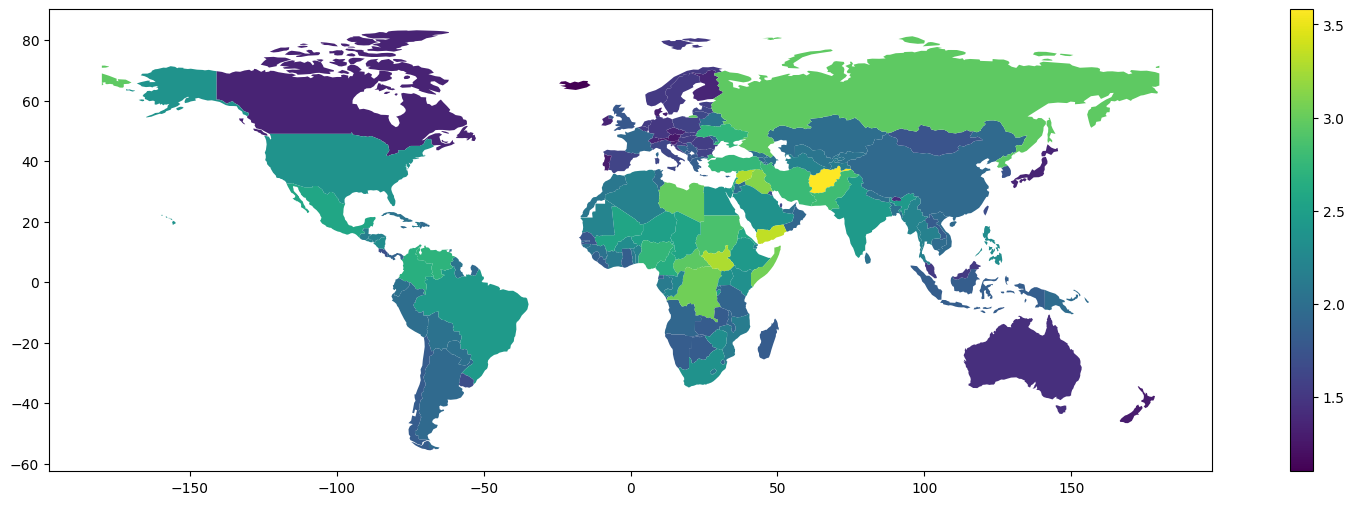

In [404]:
selected_year = 2020

figsize = (20, 6)
gdf[gdf['year'] == selected_year].to_crs('EPSG:4326').plot(
    "Overall Scores", 
    figsize=figsize, 
    legend=True
)

<Axes: >

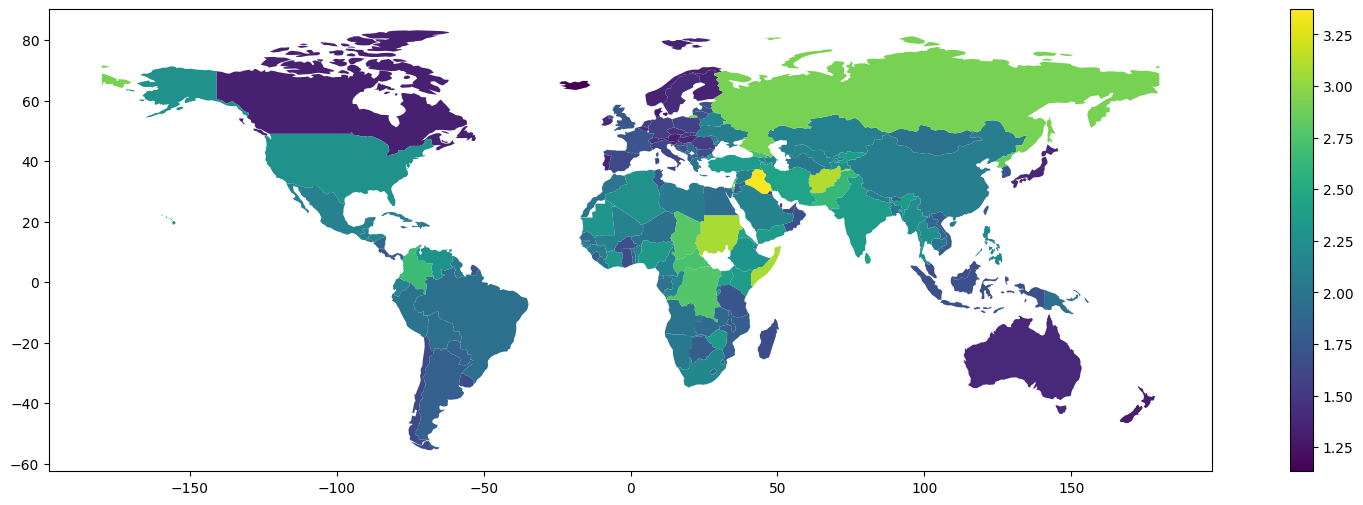

In [405]:
selected_year = 2008

figsize = (20, 6)
gdf[gdf['year'] == selected_year].to_crs('EPSG:4326').plot(
    "Overall Scores", 
    figsize=figsize, 
    legend=True
)

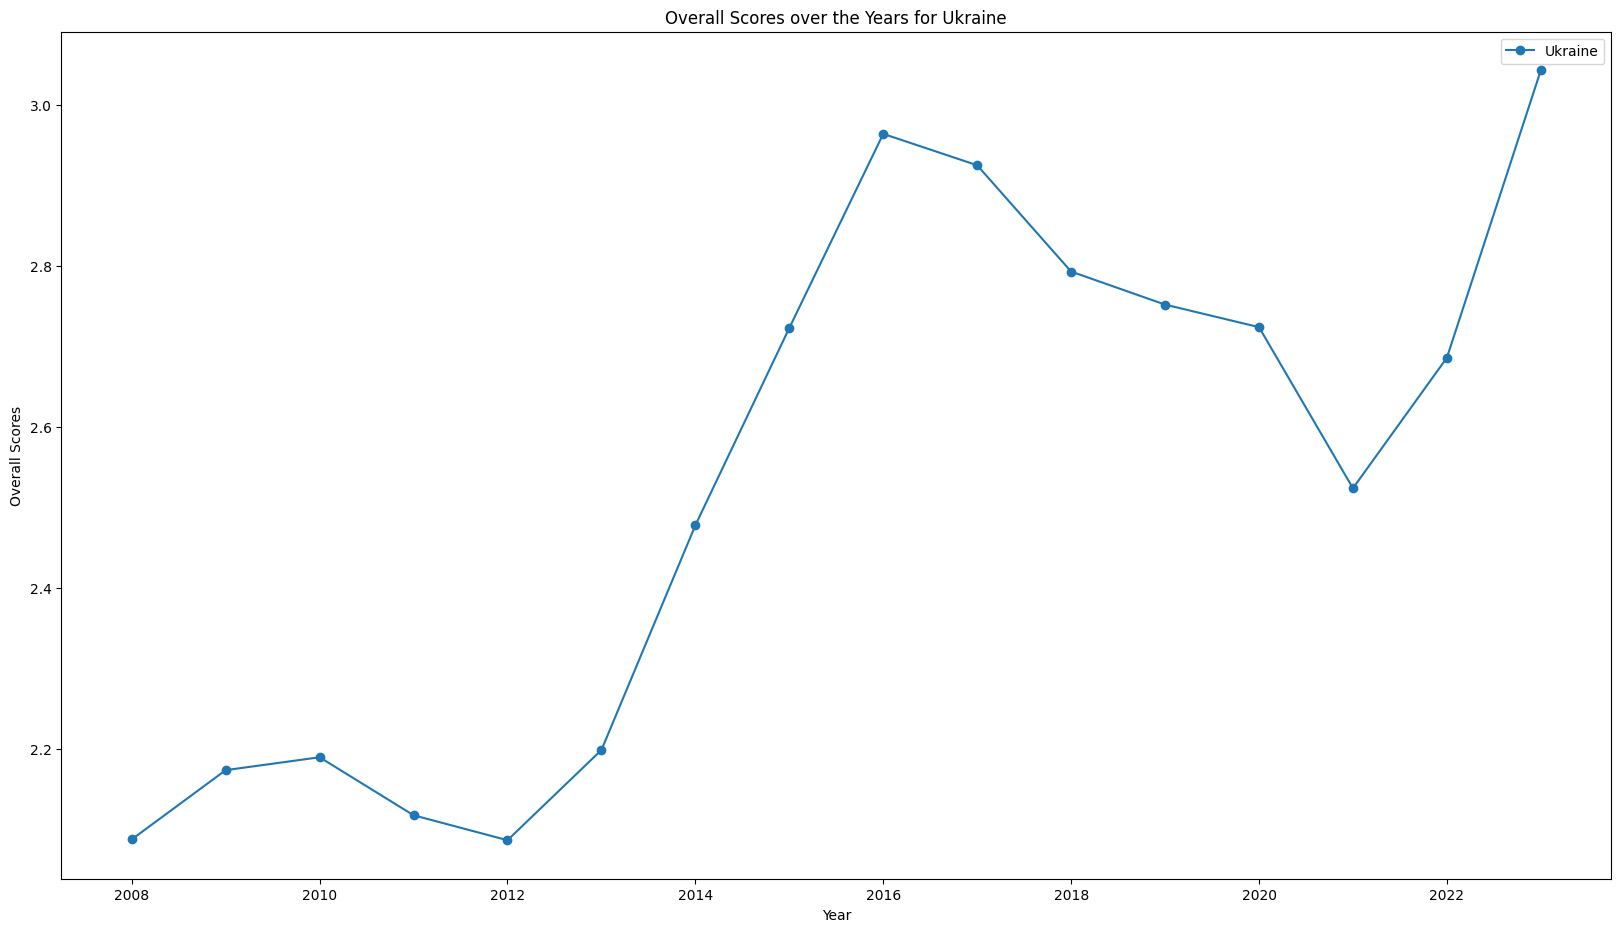

In [406]:
import matplotlib.pyplot as plt

# Assuming 'gdf' is your GeoDataFrame and it contains 'year', 'Overall Scores', and 'country' columns

# Filter the GeoDataFrame for Overall Scores greater than or equal to 3
gdf_filtered = gdf[gdf['Mean Overal score'] >= 1]

# Get a list of unique countries that meet the condition
#countries = gdf_filtered['Country'].unique()
countries = ['Ukraine']

# Create a figure
fig, ax = plt.subplots(figsize=(20, 11))

# Plot each country's scores in the same plot
for country in countries:
    # Filter the DataFrame for the current country
    country_data = gdf_filtered[gdf_filtered['Country'] == country]
    # Plot 'Overall Scores' against 'year' for the current country
    ax.plot(country_data['year'], country_data['Overall Scores'], marker='o', label=country)

# Set the title and labels
ax.set_title('Overall Scores over the Years for Ukraine')
ax.set_xlabel('Year')
ax.set_ylabel('Overall Scores')

# Enable the legend
ax.legend()

# Show the plot
plt.show()


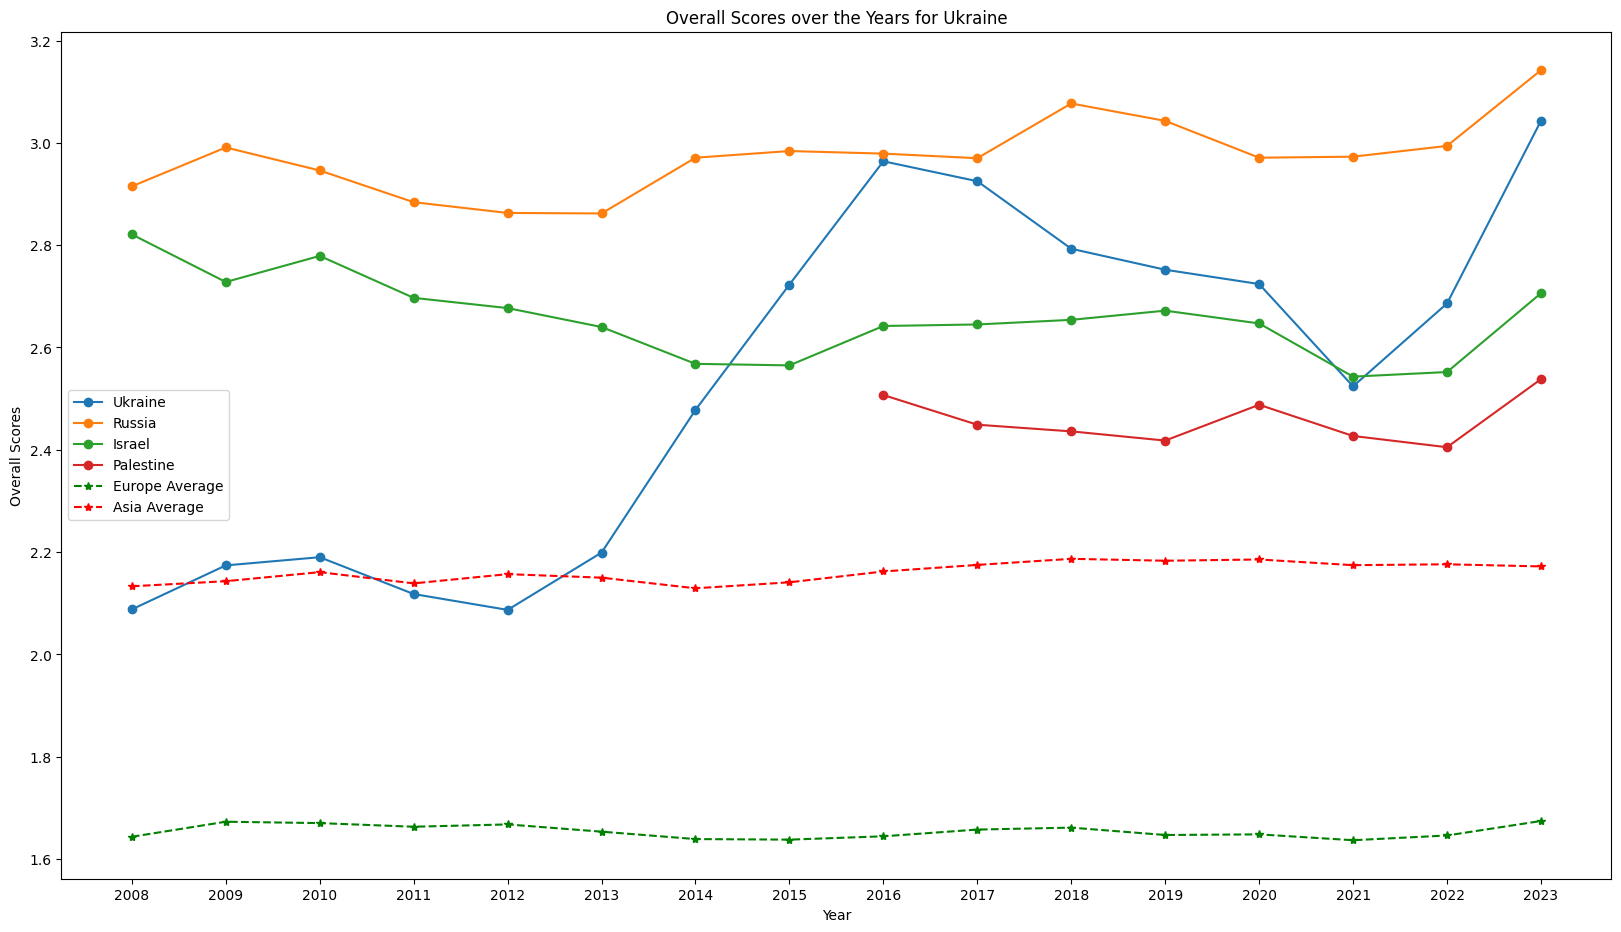

In [407]:
import matplotlib.pyplot as plt
Europe_mean_scores = gdf[gdf['continent'] == 'Europe'].groupby('year')['Overall Scores'].mean()
Asia_mean_scores = gdf[gdf['continent'] == 'Asia'].groupby('year')['Overall Scores'].mean()
#Africa_mean_scores = gdf[gdf['continent'] == 'Africa'].groupby('year')['Overall Scores'].mean()
#South_America_mean_scores = gdf[gdf['continent'] == 'South America'].groupby('year')['Overall Scores'].mean()
#North_America_mean_scores = gdf[gdf['continent'] == 'North America'].groupby('year')['Overall Scores'].mean()
#Oceania_mean_scores = gdf[gdf['continent'] == 'Oceania'].groupby('year')['Overall Scores'].mean()

# Assuming 'gdf' is your GeoDataFrame and it contains 'year', 'Overall Scores', and 'country' columns

# Filter the GeoDataFrame for Overall Scores greater than or equal to 3
gdf_filtered = gdf[gdf['Mean Overal score'] >= 1]

# Get a list of unique countries that meet the condition
#countries = gdf_filtered['Country'].unique()
countries = ['Ukraine', 'Russia', "Israel", "Palestine"]

# Create a figure
fig, ax = plt.subplots(figsize=(20, 11))

# Plot each country's scores in the same plot
for country in countries:
    # Filter the DataFrame for the current country
    country_data = gdf_filtered[gdf_filtered['Country'] == country]
    # Plot 'Overall Scores' against 'year' for the current country
    ax.plot(country_data['year'], country_data['Overall Scores'], marker='o', label=country)
    #ax.plot(country_data['year'], country_data['Safety and Security'], marker='x', label='Safety and Security')
    #ax.plot(country_data['year'], country_data['Ongoing Conflict'], marker='x', label='Ongoing Conflict')
    #ax.plot(country_data['year'], country_data['Militarian'], marker='x', label='Militarian')

ax.plot(Europe_mean_scores.index, Europe_mean_scores, marker='*', linestyle='--', color='green', label='Europe Average') 
ax.plot(Asia_mean_scores.index, Asia_mean_scores, marker='*', linestyle='--', color='red', label='Asia Average')    
#ax.plot(Africa_mean_scores.index, Africa_mean_scores, marker='o', linestyle='--', color='purple', label='Africa Average')    
#ax.plot(South_America_mean_scores.index, South_America_mean_scores, marker='o', linestyle='--', color='lightgreen', label='South America Average') 
#ax.plot(North_America_mean_scores.index, North_America_mean_scores, marker='o', linestyle='--', label='North America Average') 
#ax.plot(Oceania_mean_scores.index, Oceania_mean_scores, marker='o', linestyle='--', label='Oceania Average') 
# Set the title and labels

years = sorted(gdf['year'].unique())
ax.set_xticks(years)

ax.set_title('Overall Scores over the Years for Ukraine')
ax.set_xlabel('Year')
ax.set_ylabel('Overall Scores')

# Enable the legend
ax.legend()

# Show the plot
plt.show()


In [400]:
df2['Country'].unique()

array(['Afghanistan', 'Angola', 'Albania', 'United Arab Emirates',
       'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan',
       'Burundi', 'Belgium', 'Benin', 'Burkina Faso', 'Bangladesh',
       'Bulgaria', 'Bahrain', 'Bosnia and Herzegovina', 'Belarus',
       'Bolivia', 'Brazil', 'Bhutan', 'Botswana',
       'Central African Republic', 'Canada', 'Switzerland', 'Chile',
       'China', "Cote d' Ivoire", 'Cameroon',
       'Democratic Republic of the Congo', 'Republic of the Congo',
       'Colombia', 'Costa Rica', 'Cuba', 'Cyprus', 'Czech Republic',
       'Germany', 'Djibouti', 'Denmark', 'Dominican Republic', 'Algeria',
       'Ecuador', 'Egypt', 'Eritrea', 'Spain', 'Estonia', 'Ethiopia',
       'Finland', 'France', 'Gabon', 'United Kingdom', 'Georgia', 'Ghana',
       'Guinea', 'The Gambia', 'Guinea-Bissau', 'Equatorial Guinea',
       'Greece', 'Guatemala', 'Guyana', 'Honduras', 'Croatia', 'Haiti',
       'Hungary', 'Indonesia', 'India', 'Ireland', 'Iran', 'Iraq',


In [408]:
from dash import Dash, dcc, html
from dash.dependencies import Input, Output, State
import plotly.express as px
import plotly.graph_objs as go

app = Dash(__name__)

dropdown_options = [{'label': country, 'value': country} for country in gdf['Country'].unique()] + \
                   [{'label': f"{continent} (Continent Average)", 'value': f"{continent}_avg"} 
                    for continent in ['Europe', 'Asia', 'Africa', 'South America', 'North America', 'Oceania']]

app.layout = html.Div([
    html.Div([
        dcc.Dropdown(
            id='country-selector',
            options=dropdown_options,
            value=['Ukraine', 'Russia', 'Europe_avg'],  
            multi=True 
        ),
        dcc.Graph(id='score-plot'),
        html.Button('About', id='hello-button'),
    ], id='home-page', style={'display': 'block'}),  

html.Div([
    html.Div(
        html.P([
            html.H1('About', style={'fontFamily': 'Verdana','fontSize': '20px','color': 'black', 'fontWeight': 'normal'}),
            """
            Hello, My name is Alex de Vries.
            This dashboard was made to gain insights into world-wide safety trends and play around with dash.
            """,
            html.Br(),
            "The dataset is from visionofhumanity but can be found on ", 
            html.A("Kaggle.", href="https://www.kaggle.com/datasets/ddosad/global-peace-index-2023", target="_blank"),
            html.Br(), 
            html.A("www.alexdevri.es", href="http://www.alexdevri.es", target="_blank")," is my portfolio website.",
            html.Br(),
            "I also have a ", html.A("Linkedin page", href="https://www.linkedin.com/in/alex-de-vries-nl/", target="_blank"),
            ", feel free to connect.",
            html.Br(),
            html.Br(),
            "My ", html.A("github", href="www.github.com/defreeze", target="_blank"), 
            " has the code stored to build this dashboard in one of its repos,",
            html.Br(),
            "but there is a good chance you're running this dashboard locally.",
            html.Br(),
            "So you already have the code ;)", 
        ], style={'whiteSpace': 'pre-wrap', 'textAlign': 'center'}),
        style={'display': 'flex', 'justifyContent': 'center'}
    ),
    html.Button('Back', id='back-button'),
], id='hello-page', style={'display': 'none'})])

# Callback to switch between home and hello pages
@app.callback(
    [Output('home-page', 'style'), Output('hello-page', 'style')],
    [Input('hello-button', 'n_clicks'), Input('back-button', 'n_clicks')]
)

def display_page(hello_n_clicks, back_n_clicks):
    ctx = dash.callback_context
    if not ctx.triggered:
        raise dash.exceptions.PreventUpdate
    button_id = ctx.triggered[0]['prop_id'].split('.')[0]
    if button_id == 'hello-button':
        return {'display': 'none'}, {'display': 'block'}
    elif button_id == 'back-button':
        return {'display': 'block'}, {'display': 'none'}
    else:
        raise dash.exceptions.PreventUpdate

# Callback to update the graph based on the dropdown selection
@app.callback(
    Output('score-plot', 'figure'),
    [Input('country-selector', 'value')]
)

def update_graph(selected_values):
    selected_countries = [val for val in selected_values if "_avg" not in val]
    selected_continents = [val.replace('_avg', '') for val in selected_values if "_avg" in val]
    mean_scores_by_continent = {'Europe': Europe_mean_scores,'Asia': Asia_mean_scores,
    'Africa': Africa_mean_scores,'South America': South_America_mean_scores,
    'North America': North_America_mean_scores,'Oceania': Oceania_mean_scores,}
    traces = []

    if selected_countries:
        filtered_df = gdf[gdf['Country'].isin(selected_countries)]
        for country in selected_countries:
            country_data = filtered_df[filtered_df['Country'] == country]
            traces.append(go.Scatter(x=country_data['year'], y=country_data['Overall Scores'], mode='lines', name=country))

    for continent in selected_continents:
        continent_data = mean_scores_by_continent[continent].reset_index()
        traces.append(
            go.Scatter(
                x=continent_data['year'], y=continent_data['Overall Scores'],
                mode='lines', name=f'{continent} Average', line=dict(dash='dot'))
        )                  
    
    fig = go.Figure(data=traces)
    fig.update_layout(
        xaxis=dict(tickmode='array',tickvals=sorted(filtered_df['year'].unique())),
        title='Global Peace Index by Year for Countries and Continents',
        title_font=dict(size=20, family='Verdana', color='Black'), title_x=0.5,
    )
    fig.update_xaxes(title_text='Year')
    fig.update_yaxes(title_text='Global Peace Index (lower is better)')
    return fig


app.run_server(mode='jupyterlab') 

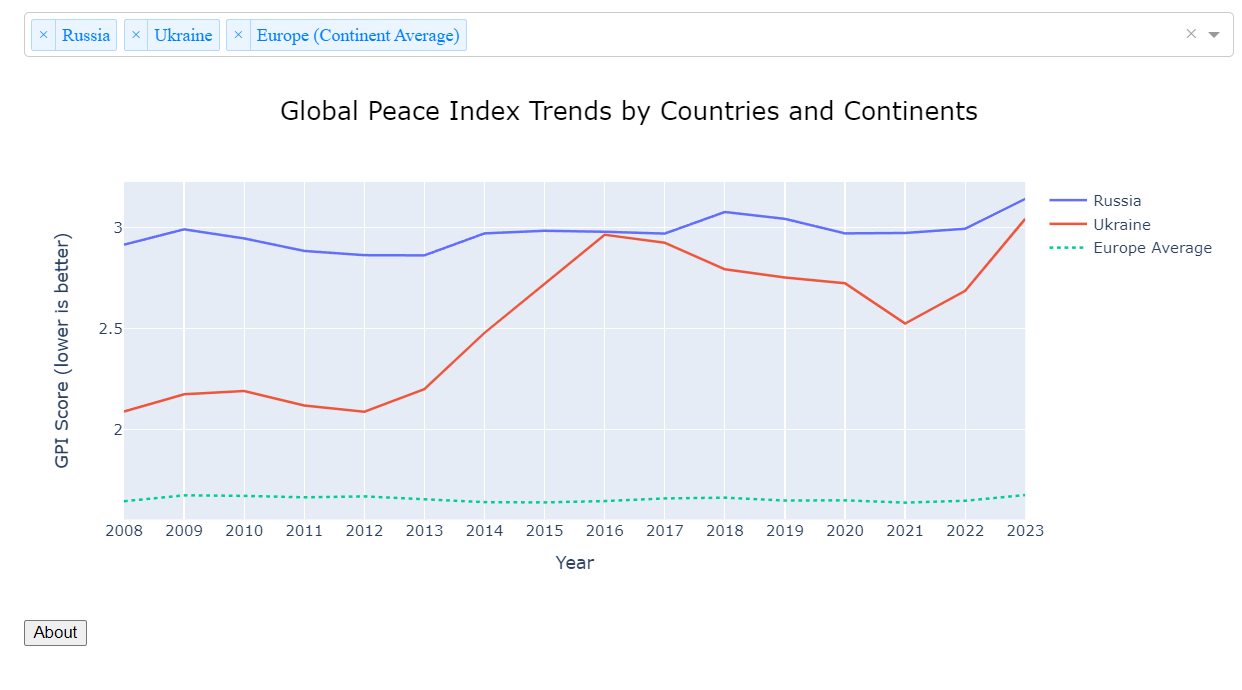

In [205]:
# print a png of what the Dash dashboard looks like 
from IPython.display import display, Image
display(Image(filename='data_vis.png'))

In [409]:
pivot_df = df2.pivot(index='Country', columns='year', values='Overall Scores')

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(pivot_df)

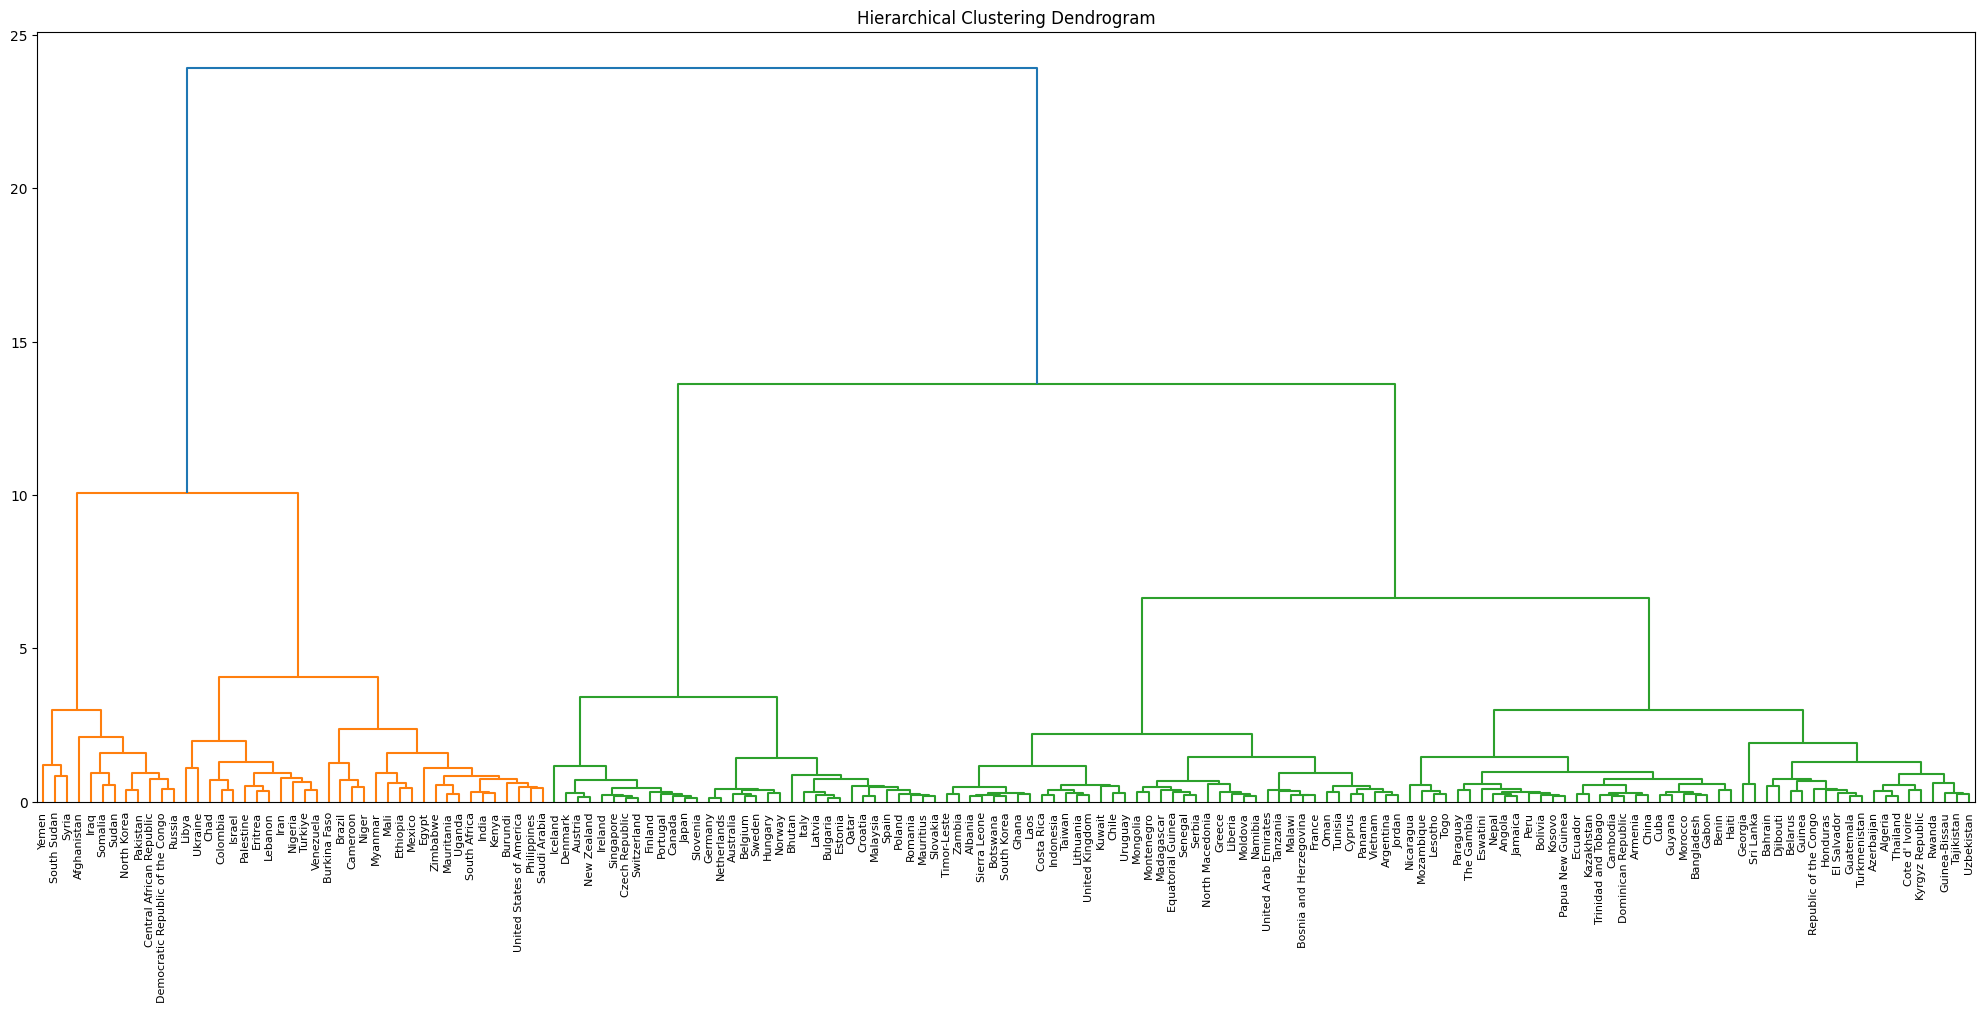

In [410]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
import numpy as np


pivot_df = pivot_df.fillna(method='bfill', axis=1)

# Now that we've back-filled, it's a good idea to check if there are still NaNs.
# This could happen if a country didn't have data in the initial and subsequent years.
if pivot_df.isnull().any().any():
    print('still missing data')

weights = np.linspace(1, 2, pivot_df.shape[1])
weighted_data = pivot_df * weights

# normalize the data, not relevant if we add weights to value recent years more
# scaler = StandardScaler()
# scaled_data = scaler.fit_transform(weighted_data)

# Perform hierarchical clustering
Z = linkage(pivot_df, method='ward')

# Plot the dendrogram for the hierarchical clustering
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
dendrogram(Z, labels=pivot_df.index, leaf_rotation=90, leaf_font_size=8,
    orientation='top',  # Rotate the dendrogram
    #p=30, show_contracted=True,
)
plt.show()


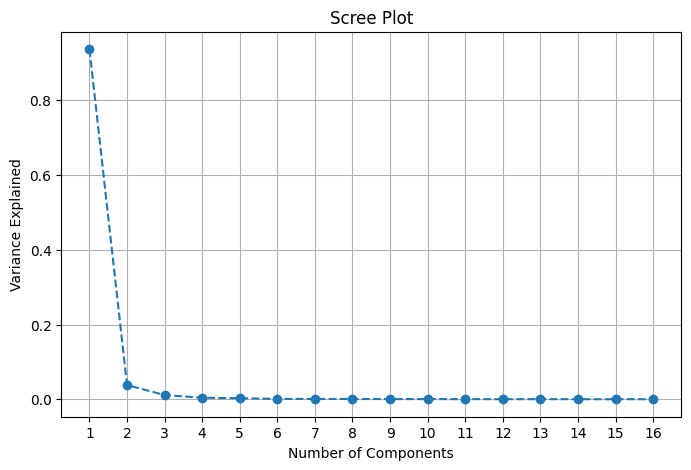

In [392]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
features = pivot_df.drop(columns='Country')

pca2 = PCA()
pca2.fit(features)
explained_variance = pca2.explained_variance_ratio_

# Create a scree plot
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--')
plt.title('Scree Plot')
plt.xlabel('Number of Components')
plt.ylabel('Variance Explained')
plt.xticks(range(1, len(explained_variance) + 1)) 
plt.grid(True)
plt.show()


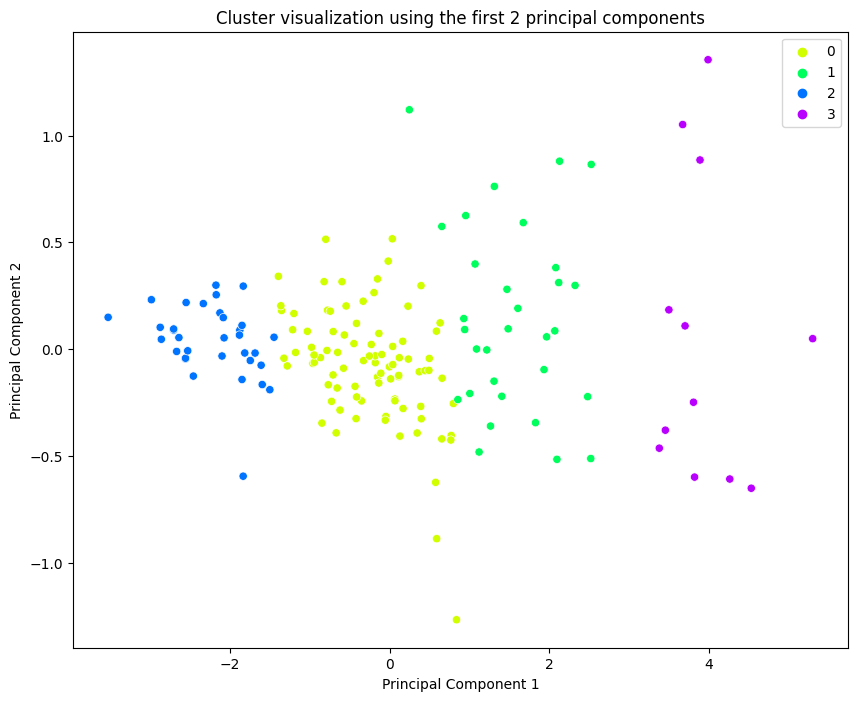

In [365]:
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
import seaborn as sns

# Perform hierarchical clustering
n_clusters = 4  
hc = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward', metric='euclidean')
cluster_labels = hc.fit_predict(pivot_df)

# the scree plot shows that 2 components are best
pca = PCA(n_components=2)
pca_result = pca.fit_transform(pivot_df)

# Plot the two principal components
plt.figure(figsize=(10, 8))
sns.scatterplot(x=pca_result[:, 0], y=pca_result[:, 1], hue=cluster_labels, palette=sns.color_palette('hsv', n_clusters), legend='full')

plt.title('Cluster visualization using the first 2 principal components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


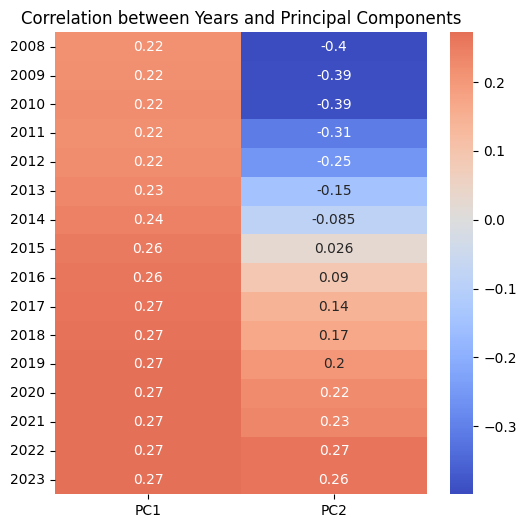

In [254]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

pca = PCA(n_components=2)
pca_result = pca.fit_transform(pivot_df)

# Create a DataFrame with the PCA results (principal components)
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])

# Calculate the correlation between the original features and the principal components
original_features = [str(year) for year in range(2008, 2024)]  
correlation_matrix = pd.DataFrame(pca.components_.T, index=original_features, columns=['PC1', 'PC2'])

plt.figure(figsize=(6, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation between Years and Principal Components')
plt.yticks(rotation=0)
plt.show()

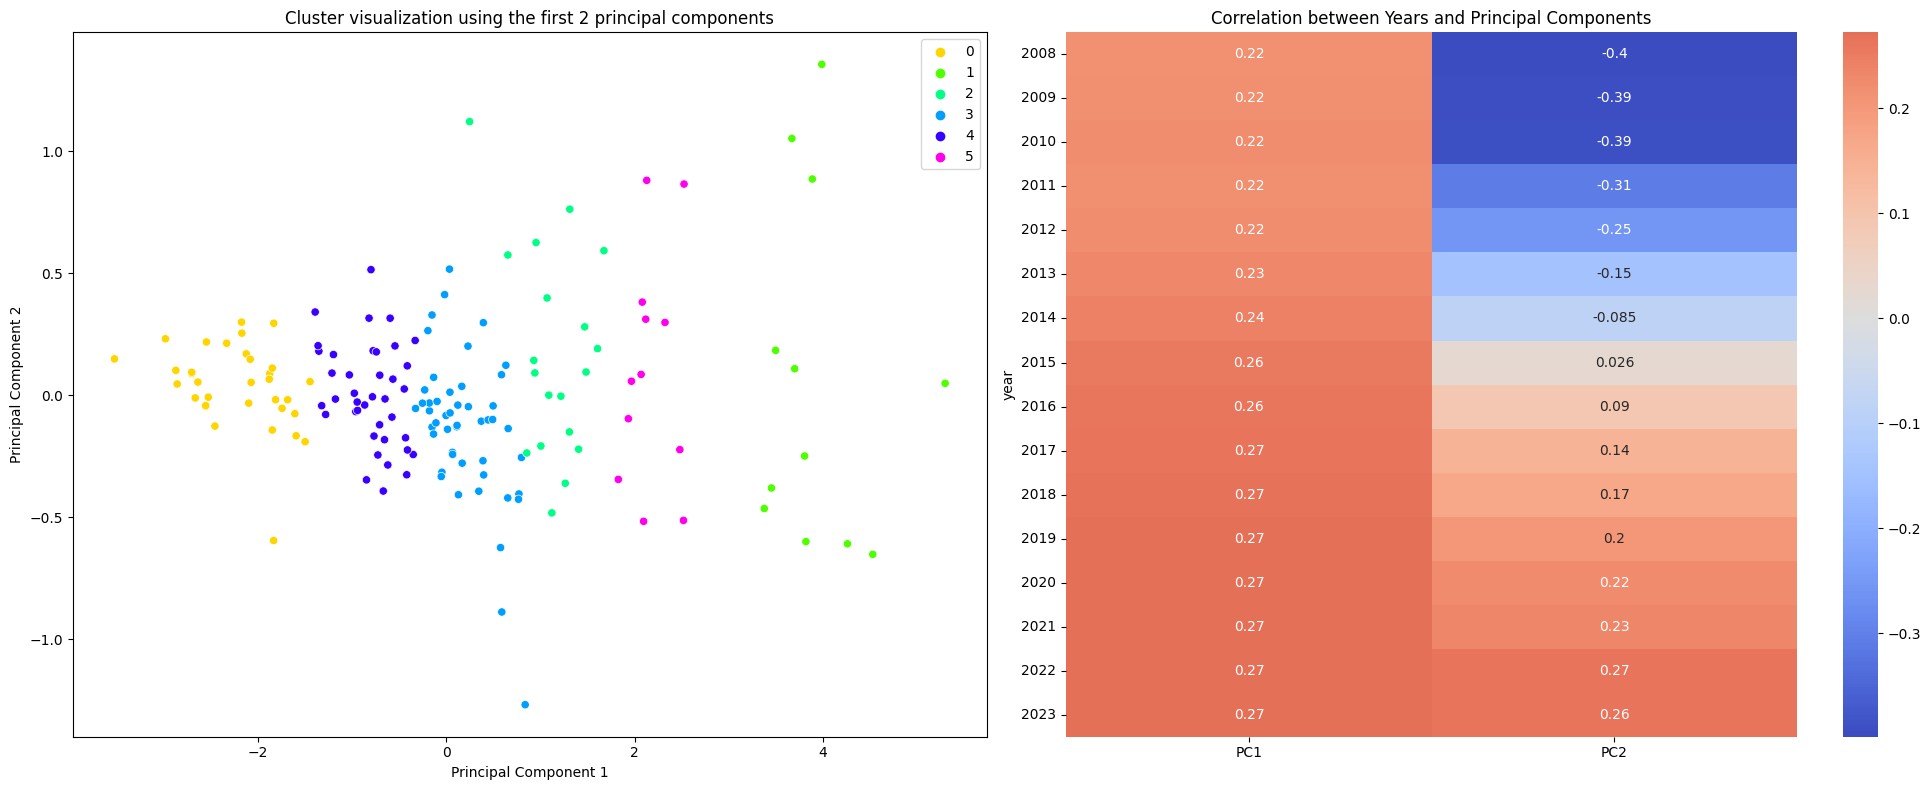

In [304]:
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

n_clusters = 6 
hc = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward', metric='euclidean')
cluster_labels = hc.fit_predict(pivot_df)

# Perform PCA to reduce the data to 2 dimensions
pca = PCA(n_components=2)
pca_result = pca.fit_transform(pivot_df)

# Fit PCA on the scaled data for correlation matrix
pca_for_corr = PCA(n_components=2)
pca_for_corr.fit(pivot_df)
correlation_matrix = pd.DataFrame(pca_for_corr.components_.T, index=pivot_df.columns, columns=['PC1', 'PC2'])


fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 8))
sns.scatterplot(x=pca_result[:, 0], y=pca_result[:, 1], hue=cluster_labels, 
                palette=sns.color_palette('hsv', n_clusters), legend='full', ax=axes[0])
axes[0].set_title('Cluster visualization using the first 2 principal components')
axes[0].set_xlabel('Principal Component 1')
axes[0].set_ylabel('Principal Component 2')

# Plotting the heatmap of the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, ax=axes[1])
axes[1].set_title('Correlation between Years and Principal Components')
# Fix the yticks rotation
plt.setp(axes[1].get_yticklabels(), rotation=0)  

plt.tight_layout()  
plt.show()


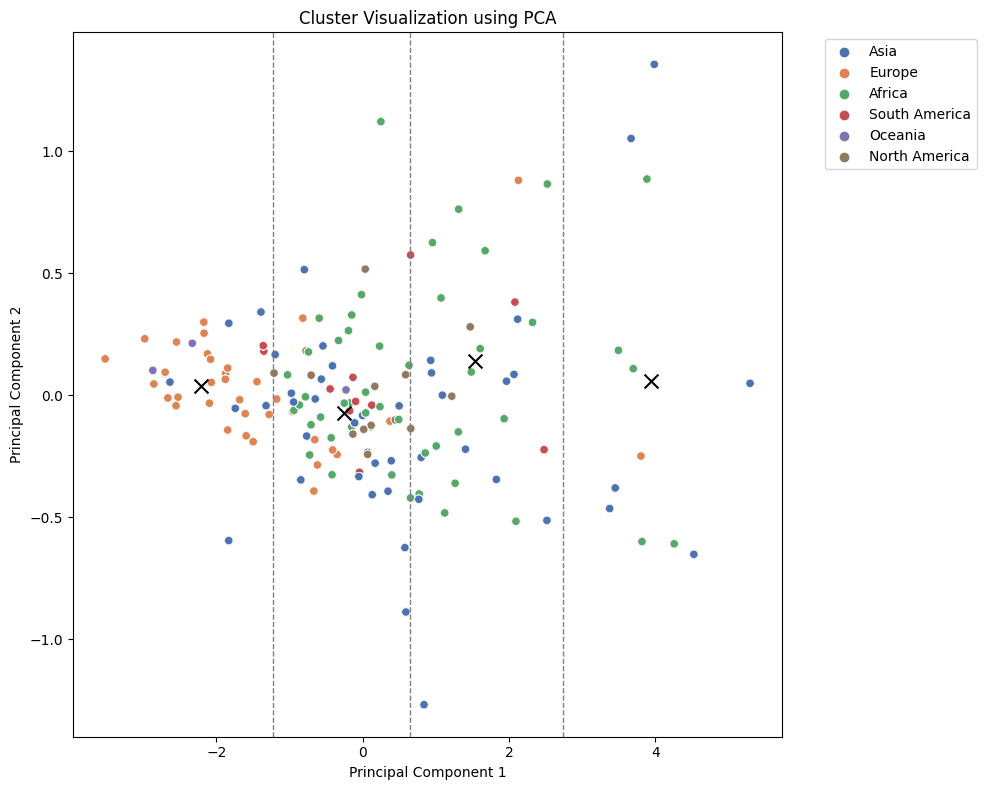

In [367]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
import seaborn as sns

# ... [previous setup code for combined_df]

# Begin plotting
plt.figure(figsize=(10, 8))

# Plot the PCA components with colors based on continent
sns.scatterplot(
    x='PC1', 
    y='PC2', 
    data=combined_df, 
    hue='continent', 
    palette=sns.color_palette('deep', n_colors=combined_df['continent'].nunique()),
    legend='full'
)

# Calculate centroids of each cluster
centroids = combined_df.groupby('cluster_labels')[['PC1', 'PC2']].mean().sort_values(by='PC1').reset_index()

# Plot the centroids
plt.scatter(centroids['PC1'], centroids['PC2'], s=100, c='black', marker='x')

# Draw a mostly vertical line through the midpoints between cluster centroids
for i in range(len(centroids) - 1):
    mid_x = (centroids.loc[i, 'PC1'] + centroids.loc[i + 1, 'PC1']) / 2
    plt.axvline(x=mid_x, color='grey', linestyle='--', linewidth=1)

# Add titles and labels
plt.title('Cluster Visualization using PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Move the legend to avoid covering the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


In [292]:
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
# Now you're using the correct column index for 'country', which should be the first column (index 0).
pca_df['Country'] = pivot_df.iloc[:, 1]

# Merge the PCA results with the continent information
combined_df = pca_df.merge(df2, on='Country', how='left')

['Country',
 'iso3c',
 'year',
 'Overall Scores',
 'Safety and Security',
 'Ongoing Conflict',
 'Militarian',
 'pop_est',
 'continent',
 'gdp_md_est',
 'geometry',
 'pop_density',
 'Mean Overal score']

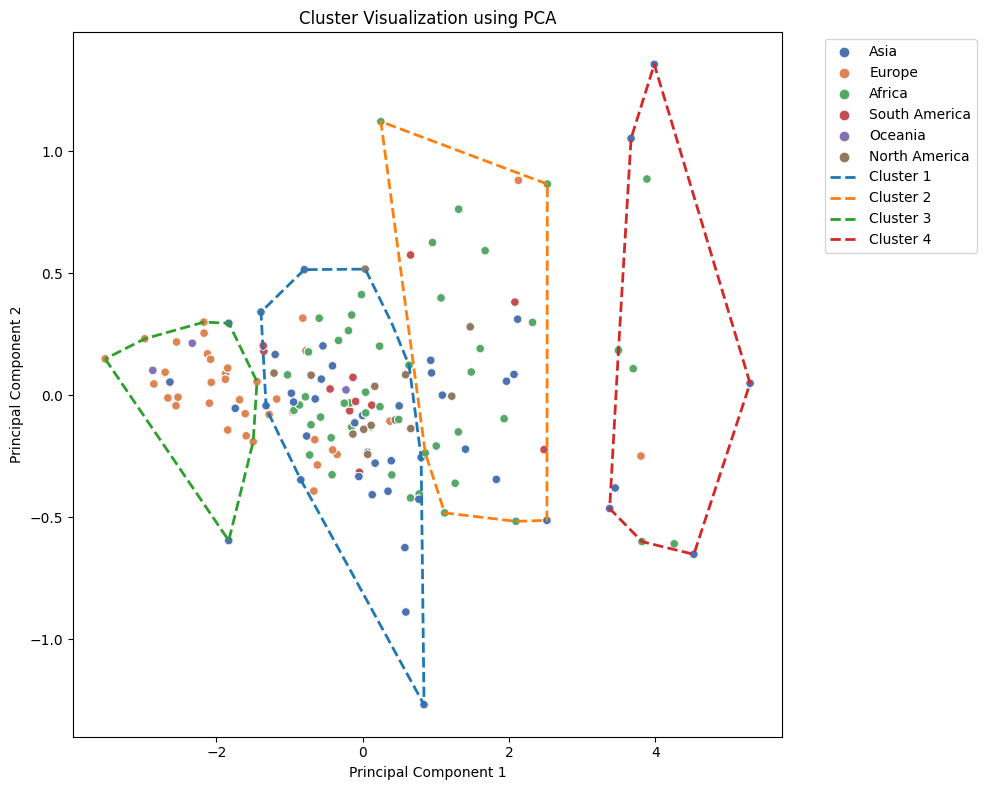

In [360]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from scipy.spatial import ConvexHull
import seaborn as sns

# Set the number of clusters for PCA groups
n_clusters = 4  # Update this number to change the amount of PCA groups

# Assume df2 has been preprocessed to include 'Country', 'continent', and yearly score columns
# Create pivot_df from df2 and fill missing values
pivot_df = df2.pivot(index='Country', columns='year', values='Overall Scores')
pivot_df = pivot_df.fillna(method='bfill', axis=1).reset_index()

# Perform hierarchical clustering
hc = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
cluster_labels = hc.fit_predict(pivot_df.drop(columns='Country'))  # Exclude 'Country' column for clustering

# Perform PCA to reduce the data to 2 dimensions
pca = PCA(n_components=2)
pca_result = pca.fit_transform(pivot_df.drop(columns='Country'))  # Exclude 'Country' column for PCA

# Create a DataFrame with the PCA results and the cluster labels
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])
pca_df['cluster_labels'] = cluster_labels
pca_df['Country'] = pivot_df['Country']  # Add 'Country' column back for the merge

# Merge the continent information into the PCA DataFrame
combined_df = pca_df.merge(df2[['Country', 'continent']], on='Country', how='left')

# Begin plotting
plt.figure(figsize=(10, 8))

# Plot the PCA components with colors based on continent
sns.scatterplot(
    x='PC1', 
    y='PC2', 
    data=combined_df, 
    hue='continent', 
    palette=sns.color_palette('deep', n_colors=combined_df['continent'].nunique()),  # Adjust the number of colors to match the number of continents
    legend='full'
)

# Calculate and plot convex hulls for each cluster
for i in range(n_clusters):
    cluster_data = combined_df[combined_df['cluster_labels'] == i]
    if cluster_data.shape[0] > 2:  # Convex hull requires at least 3 points
        points = cluster_data[['PC1', 'PC2']].values
        hull = ConvexHull(points)
        hull_indices = np.append(hull.vertices, hull.vertices[0])
        plt.plot(
            points[hull_indices, 0], 
            points[hull_indices, 1], 
            linestyle='--', 
            linewidth=2, 
            label=f'Cluster {i+1}'
        )

# Add titles and labels
plt.title('Cluster Visualization using PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Move the legend to avoid covering the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


In [381]:
# test code to build a dash dashboard for the hyrarchy plot
import dash
from dash import dcc, html  # Adjusted for Dash v2.x
import plotly.graph_objects as go
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
import pandas as pd

# ... [previous code to prepare combined_df]

# Plot using Plotly Graph Objects
fig = go.Figure()

# Add scatter plot traces for each continent
for continent in combined_df['continent'].unique():
    df_sub = combined_df[combined_df['continent'] == continent]
    fig.add_trace(go.Scatter(
        x=df_sub['PC1'],
        y=df_sub['PC2'],
        text=df_sub['Country'],  # Country names will appear on hover
        mode='markers',
        name=continent,
        marker=dict(
            size=8,  # or any other size
            opacity=0.8,  # Adjust the opacity
            line=dict(width=0.5, color='DarkSlateGrey'),
        )
    ))

# Customize layout
fig.update_layout(
    title={
        'text': 'PCA ',
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    },
    xaxis_title='Principal Component 1',
    yaxis_title='Principal Component 2',
    legend_title='Continent',
    hovermode='closest'  # Show hover for the closest data point
)

# Define the Dash app
app = dash.Dash(__name__)

app.layout = html.Div([
    dcc.Graph(figure=fig)
])

if __name__ == '__main__':
    app.run_server(debug=True)


In [425]:
from dash import dcc, html, Input, Output, callback_context
import plotly.graph_objs as go
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
import pandas as pd
import numpy as np

app = dash.Dash(__name__)

# Assuming combined_df has been prepared as before with 'Country' and 'continent' columns
# Generate dropdown options for countries and continents
dropdown_options = [
    {'label': 'All Countries', 'value': 'All'},
] + [{'label': country, 'value': country} for country in combined_df['Country'].unique()]


app.layout = html.Div([
    dcc.Dropdown(
        id='country-dropdown',
        options=dropdown_options,
        value=['All'],  # Default value
        multi=True,
        clearable=False,
        searchable=True  # Allow searching within the dropdown
    ),
    dcc.Graph(id='cluster-graph'),
    html.Button('Toggle Centroids', id='toggle-button', n_clicks=0)
])

@app.callback(
    Output('cluster-graph', 'figure'),
    [Input('country-dropdown', 'value'),
     Input('toggle-button', 'n_clicks')]
)
def update_figure(selected_countries, n_clicks):
    show_centroids = n_clicks % 2 == 0
    
    # Check if 'All' is in the selection and act accordingly
    if 'All' in selected_countries:
        filtered_df = combined_df.copy()
    else:
        # Use the .isin method to filter when a list of countries is selected
        filtered_df = combined_df[combined_df['Country'].isin(selected_countries)]

    # Call the create_figure function with the filtered data
    return create_figure(filtered_df, show_centroid_lines=show_centroids)


# The create_figure function now takes the filtered DataFrame
def create_figure(dataframe, show_centroid_lines=True):
    # Assuming 'PC1' and 'PC2' are the PCA components in the dataframe
    fig = go.Figure()

    # Add scatter plot traces for each continent or country
    if 'continent' in dataframe:
        for continent in dataframe['continent'].unique():
            df_sub = dataframe[dataframe['continent'] == continent]
            fig.add_trace(go.Scatter(
                x=df_sub['PC1'],
                y=df_sub['PC2'],
                mode='markers',
                marker=dict(size=8, opacity=0.8, line=dict(width=0.5, color='DarkSlateGrey')),
                name=continent,
                text=df_sub['Country'],  # This will be displayed on hover
            ))
    else:
        fig.add_trace(go.Scatter(
            x=dataframe['PC1'],
            y=dataframe['PC2'],
            mode='markers',
            marker=dict(size=8, opacity=0.8, line=dict(width=0.5, color='DarkSlateGrey')),
            text=dataframe['Country'],  # This will be displayed on hover
        ))

    # Add centroid traces and lines if toggle is on
    if show_centroid_lines:
        centroids = dataframe.groupby('cluster_labels')[['PC1', 'PC2']].mean().sort_values(by='PC1').reset_index()
        fig.add_trace(go.Scatter(
            x=centroids['PC1'],
            y=centroids['PC2'],
            mode='markers',
            marker=dict(
                color='black',
                size=12,  # Slightly larger centroid markers
                opacity=0.7,  # Semi-transparent
                symbol='circle',
                line=dict(
                    color='black',
                    width=2
                )
            ),
            name='Centroids'
        ))
        # Draw lines between centroids
        for i in range(len(centroids) - 1):
            mid_x = (centroids.loc[i, 'PC1'] + centroids.loc[i + 1, 'PC1']) / 2
            fig.add_shape(type='line', x0=mid_x, y0=dataframe['PC2'].min(), x1=mid_x, y1=dataframe['PC2'].max(),
                          line=dict(color='grey', width=1, dash='dot'))

    # Update the layout of the figure
    fig.update_layout(
        title={
            'text': 'Cluster Visualization using PCA',
            'y': 0.9,
            'x': 0.5,
            'xanchor': 'center',
            'yanchor': 'top'
        },
        xaxis_title='Principal Component 1',
        yaxis_title='Principal Component 2',
        hovermode='closest',
        showlegend=True
    )

    return fig


# Run the app
if __name__ == '__main__':
    app.run_server(debug=True)


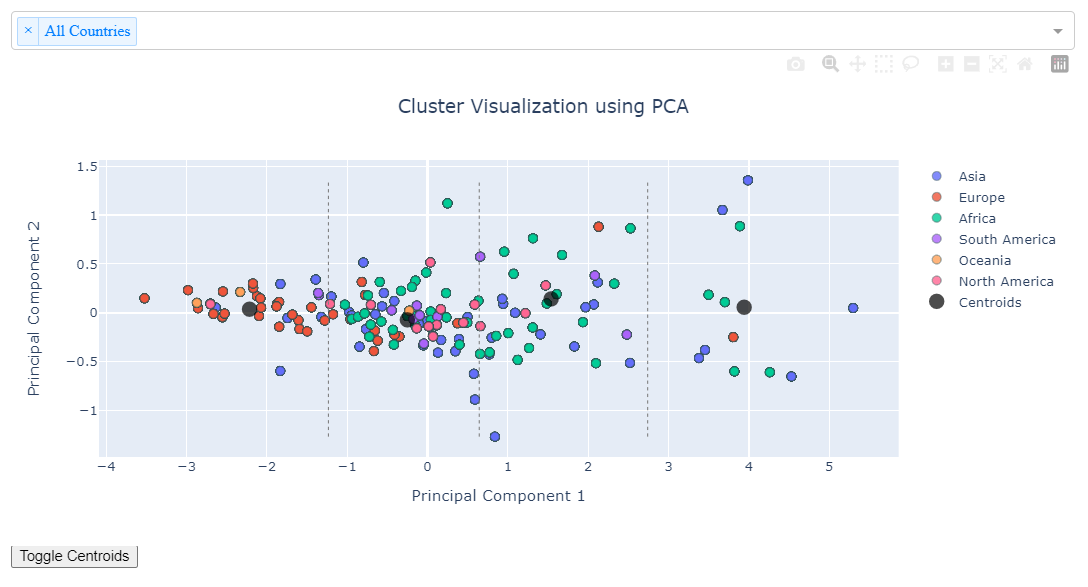

In [426]:
display(Image(filename='PCA_vis2.png'))